In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('tesla.csv')
display(data)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [3]:
# Extract the 'Close' prices 
close_prices = data['Close'].values.reshape(-1, 1)
print("Close price is:",close_prices)

Close price is: [[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [255.729996]
 [262.049988]
 [261.5     ]]


In [4]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)
print("Scaled data is:",scaled_data)

Scaled data is: [[0.02993635]
 [0.02971433]
 [0.02279455]
 ...
 [0.88784039]
 [0.91122698]
 [0.9091918 ]]


In [6]:
sequence_length = 60  
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [9]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("X train test is:",X_train, X_test)
print("y train test is:",y_train, y_test)

X train test is: [[[0.02993635]
  [0.02971433]
  [0.02279455]
  ...
  [0.01946418]
  [0.01839106]
  [0.01506069]]

 [[0.02971433]
  [0.02279455]
  [0.01258141]
  ...
  [0.01839106]
  [0.01506069]
  [0.01391355]]

 [[0.02279455]
  [0.01258141]
  [0.00114713]
  ...
  [0.01506069]
  [0.01391355]
  [0.01591178]]

 ...

 [[0.86315864]
  [0.82456334]
  [0.85808908]
  ...
  [0.76228536]
  [0.75566159]
  [0.74729867]]

 [[0.82456334]
  [0.85808908]
  [0.85024422]
  ...
  [0.75566159]
  [0.74729867]
  [0.74914888]]

 [[0.85808908]
  [0.85024422]
  [0.83677466]
  ...
  [0.74729867]
  [0.74914888]
  [0.7912966 ]]] [[[0.85024422]
  [0.83677466]
  [0.85986527]
  ...
  [0.74914888]
  [0.7912966 ]
  [0.79858642]]

 [[0.83677466]
  [0.85986527]
  [0.8626036 ]
  ...
  [0.7912966 ]
  [0.79858642]
  [0.79359084]]

 [[0.85986527]
  [0.8626036 ]
  [0.86101239]
  ...
  [0.79858642]
  [0.79359084]
  [0.81923473]]

 ...

 [[0.67266132]
  [0.69083037]
  [0.69171843]
  ...
  [0.84328743]
  [0.85246444]
  [0.896

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
41/41 [==============================] - 26s 121ms/step - loss: 0.0348
Epoch 2/50
41/41 [==============================] - 5s 130ms/step - loss: 0.0016
Epoch 3/50
41/41 [==============================] - 5s 121ms/step - loss: 0.0014
Epoch 4/50
41/41 [==============================] - 5s 120ms/step - loss: 0.0013
Epoch 5/50
41/41 [==============================] - 5s 119ms/step - loss: 0.0013
Epoch 6/50
41/41 [==============================] - 5s 121ms/step - loss: 0.0013
Epoch 7/50
41/41 [==============================] - 5s 120ms/step - loss: 0.0012
Epoch 8/50
41/41 [==============================] - 5s 120ms/step - loss: 0.0011
Epoch 9/50
41/41 [==============================] - 5s 118ms/step - loss: 0.0011
Epoch 10/50
41/41 [==============================] - 5s 120ms/step - loss: 0.0011
Epoch 11/50
41/41 [==============================] - 5s 122ms/step - loss: 0.0010
Epoch 12/50
41/41 [==============================] - 5s 120ms/step - loss: 9.5426e-04
Epoch 13/50
41/41 [=

In [12]:
# Make predictions
predicted_stock_prices = model.predict(X_test)

11/11 [==============================] - 4s 47ms/step


In [14]:
# Inverse transform the predictions to get the original scale
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
y_test = scaler.inverse_transform(y_test)
print("Predict stock price is:",predicted_stock_prices)

Predict stock price is: [[60435.22 ]
 [61058.367]
 [61963.355]
 [62064.98 ]
 [61938.81 ]
 [61560.61 ]
 [61334.883]
 [60798.7  ]
 [60160.062]
 [60014.777]
 [59066.137]
 [58406.73 ]
 [58361.766]
 [59870.64 ]
 [61160.58 ]
 [61555.938]
 [61729.176]
 [61499.492]
 [61204.504]
 [61095.08 ]
 [60917.555]
 [61632.02 ]
 [62432.543]
 [63126.566]
 [61787.06 ]
 [60381.582]
 [59108.582]
 [58042.168]
 [56997.652]
 [56062.145]
 [55735.574]
 [54785.047]
 [54569.125]
 [54555.066]
 [54575.35 ]
 [54019.863]
 [53609.758]
 [53643.637]
 [53214.42 ]
 [52525.973]
 [51499.918]
 [50894.8  ]
 [50780.945]
 [51392.203]
 [50712.848]
 [49020.2  ]
 [47790.31 ]
 [46023.137]
 [43453.65 ]
 [41538.297]
 [40082.29 ]
 [39765.746]
 [39960.105]
 [40597.996]
 [42289.805]
 [43687.477]
 [44527.35 ]
 [45836.434]
 [46836.188]
 [47542.492]
 [48644.656]
 [49770.816]
 [50659.875]
 [50649.164]
 [50521.83 ]
 [51087.3  ]
 [52182.484]
 [53468.2  ]
 [54105.22 ]
 [54878.48 ]
 [55080.594]
 [55241.117]
 [56072.207]
 [57123.34 ]
 [58197.207]
 

In [15]:
# Calculate mean squared error
mse = mean_squared_error(y_test, predicted_stock_prices)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4036483.791617149


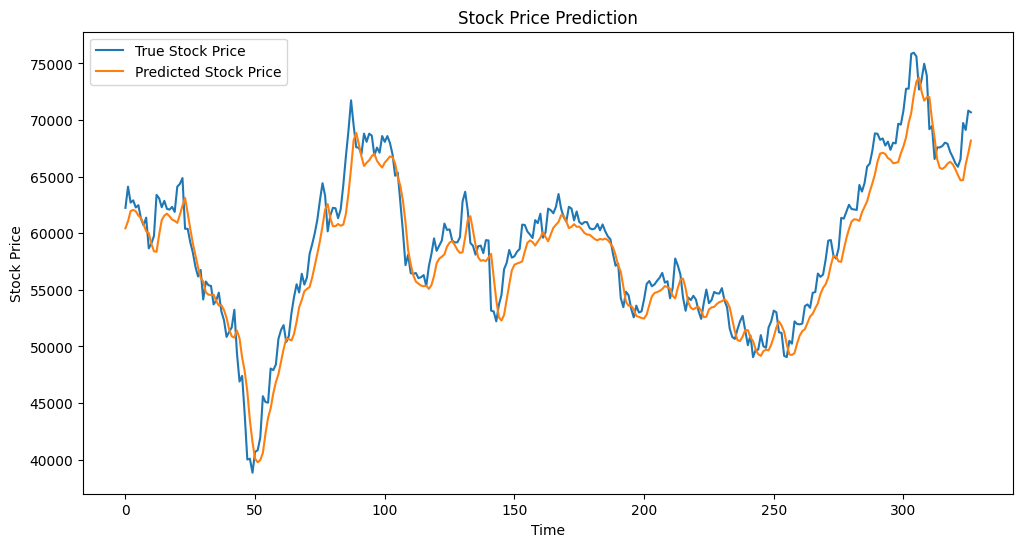

In [16]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Stock Price')
plt.plot(predicted_stock_prices, label='Predicted Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.show()

In [21]:
date_of_highest_price = data['Date'][data['High'].idxmax()]
highest_price = data['High'].max()

In [19]:
# Find the date with the lowest stock price
date_of_lowest_price = data['Date'][data['Low'].idxmin()]
lowest_price = data['Low'].min()

In [20]:
print(f"Date of Highest Price: {date_of_highest_price}")
print(f"Highest Price: {highest_price}")
print(f"Date of Lowest Price: {date_of_lowest_price}")
print(f"Lowest Price: {lowest_price}")

Date of Highest Price: 9/4/2014
Highest Price: 291.420013
Date of Lowest Price: 7/7/2010
Lowest Price: 14.98


In [26]:
plt.figure(figsize=(130, 50))
plt.plot(data['Date'], data['High'], label='High Price', color='green')
plt.plot(data['Date'], data['Low'], label='Low Price', color='red')
plt.tight_layout()
plt.show()